# Проект: Исследование стартапов

## Введение

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
# Импортируем библиотеки
import pandas as pd
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
# Загружаем библиотеки для визуализации данных
import seaborn as sns

!pip install scipy

import scipy.stats

# Проверяем наличие библиотеки phik
try:
    from phik import phik_matrix  # Добавлено для импорта функции phik_matrix
except ModuleNotFoundError:
    print("Библиотека 'phik' не найдена. Убедитесь, что она установлена.")
    # Установка библиотеки phik
    !pip install phik
    # Рекомендуется перезапустить ядро после установки
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

In [4]:
df_company = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

In [5]:
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [6]:
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

In [7]:
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [8]:
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [9]:
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [10]:
df_acquisition.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [11]:
df_company.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

Наименования столбцов датафрейма df_company содержат пробелы, заменим их на '_'

In [12]:
df_company.columns = df_company.columns.str.replace(' ', '_').str.lower()

In [13]:
df_company.columns

Index(['company__id', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round'],
      dtype='object')

In [14]:
df_company.columns = ['company__id', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id_1', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round']
df_company.columns

Index(['company__id', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id_1', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round'],
      dtype='object')

In [15]:
# Объединение значений в один столбец
df_company['company_ID'] = df_company.apply(lambda row: f"{row['company__id']}, {row['company__id_1']}", axis=1)
df_company.columns

Index(['company__id', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id_1', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round', 'company_ID'],
      dtype='object')

In [16]:
df_degrees.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [17]:
df_education.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [18]:
df_fund.columns

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [19]:
df_investment.columns

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

In [20]:
df_people.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Пробелы в наименованиях столбцов в датафрейме df_company заменены на '_'. После преобразования все наименования столбцов в едином столе, все представлены типом данных object.


* Выведем информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [21]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [22]:
display(df_acquisition)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


In [23]:
df_acquisition.duplicated().sum()

0

Датасет df_acquisition содержит информацию о покупках одними компаниями других компаний. Представлен 6  столбцами и содержит 9407 строк. Объем данных 441.1+ KB. Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. Столбец acquired_at так же представлен типом данных object.
Предложения: acquired_at перевести в тип данных datetime. id уменьшить разрядность типа данных.
Дубликатов нет

In [24]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company__id            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category__code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded__at            109956 non-null  object 
 5   closed__at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network__username      95534 non-null   object 
 8   country__code          108607 non-null  object 
 9   investment__rounds     217472 non-null  float64
 10  funding__rounds        217472 non-null  float64
 11  funding__total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding__round__id     52928 non-null   float64
 14  company__id_1          52928 non-nul

In [25]:
display(df_company)

,company__id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,funding__round__id,company__id_1,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round,company_ID
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,"1.0, 1.0"
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,"1.0, 1.0"
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,"1.0, 1.0"
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10.0, nan"
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"100.0, nan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,"nan, 282847.0"
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,"nan, 55477.0"
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,"nan, 55477.0"
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,"nan, 283492.0"


In [26]:
df_company.duplicated().sum()

0

Датасет df_company Содержит информацию о компаниях и раундах финансирования. Представлен 22  столбцами и содержит 217774 строками. Объем данных 36.6+ MB. 
Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. Столбцы acquired_at, closed at, funded at представлены типом данных object. 
Предложения: founded__at, closed at, funded at перевести в тип данных datetime. Учитывая условия задания в задаче 3, оставим датасет df_company без преобразования.Дубликатов нет.

In [27]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [28]:
display(df_degrees)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


In [29]:
df_degrees.duplicated().sum()

0

Датасет df_degrees Содержит информацию об образовании сотрудника. Представлен 4 столбцами и содержит 109610 строк. Объем данных 3.3+ MB. 
Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. 
Предложения: id уменьшить разрядность типа данных. Дубликатов нет.

In [30]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [31]:
display(df_education)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN


In [32]:
df_education.duplicated().sum()

0

Датасет df_education Содержит информацию информацию о сотрудниках. Представлен 4 столбцами и содержит 109610 строк. Объем данных 3.3+ MB. 
Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. 
Предложения: id уменьшить разрядность типа данных. graduated_at перевести в тип данных datetime. Дубликатов нет.

In [33]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [34]:
display(df_fund)

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...
11647,9997,Axel Johnson,1920-01-01,axeljohnson.com,NaN,USA,1,1,0
11648,9998,Liberty City Ventures,2012-07-01,libertycityventures.com,LCVentures,USA,5,5,0
11649,9999,CalSTRS,1913-07-01,calstrs.com,CalSTRS,USA,1,1,0
11650,11555,Haystack,2013-01-01,network.com::haystack_fund,haystack_fund,NaN,5,5,0


In [35]:
df_fund.duplicated().sum()

0

Датасет display Содержит  информацию о фондах. Представлен 9 столбцами и содержит 11652 строк. Объем данных 819.4+ KB. 
Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. 
Предложения: id уменьшить разрядность типа данных. founded_at перевести в тип данных datetime. Дубликатов нет.

In [36]:
df_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [37]:
display(df_investment)

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5
...,...,...,...,...
61398,61399,57926,15847,173
61399,61400,57926,15847,1290
61400,61401,57926,15847,73
61401,61402,57942,70841,15098


In [38]:
df_investment.duplicated().sum()

0

Датасет df_investment Содержит информацию о раундах инвестирования. Представлен 4 столбцами и содержит 61403 строк. Объем данных 1.9 MB. 
Dct cтолбцы с числовыми данными представлены типом данных int64 
Предложения: учитывая небольшой объем памяти, можно оставить в первоначальном виде. Дубликатов нет.

In [39]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [40]:
display(df_people)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


In [41]:
df_people.duplicated().sum()

0

Датасет df_people Содержит информацию о типе образования сотрудника. Представлен 5 столбцами и содержит 226709 строк. Объем данных 8.6+ MB. 
Столбцы с числовыми данными представлены типом данных int64, float64, столбцы с вещественными данными представлены типом данных object. 
Предложения: id уменьшить разрядность типа данных. Дубликатов нет.

### 1.2. Смена типов и анализ пропусков

* Обработка типов данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оценка полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [42]:
# Оптимизируем целочисленный тип данных в датафрейме df_acquisition['id']
df_acquisition['id'] = pd.to_numeric(df_acquisition['id'], downcast='integer') 

In [43]:
#Приведем к типу данных datetime в датафрейме 
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'], errors='coerce')

In [44]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int64(3), object(1)
memory usage: 386.0+ KB


In [45]:
# Вычисляем  сумму пропущенных значений в df_acquisition
df_acquisition.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [46]:
# Вычисляем процент пропущенных значений в df_acquisition
missing = (df_acquisition.isna().sum() / df_acquisition.shape[0]).sort_values(ascending=False)

# Преобразуем Series в df_acquisition
missing_df = missing.to_frame(name='Missing')

# Применяем градиентный фон к результатам
styled_output = missing_df.style.background_gradient(cmap='coolwarm', axis=0).set_precision(2)

styled_output

,Missing
term_code,0.81
acquired_at,0.00
id,0.00
acquiring_company_id,0.00
acquired_company_id,0.00
price_amount,0.00


датафрейм df_acquisition стоблец term_code содержит 7576 пропусков (81%) и acquired_at 29 пропусков (0%). Значимое количество попусков в столбце term_code - варианты расчёта.

In [47]:
# Вычисляем  сумму пропущенных значений в df_company
df_company.isna().sum()

company__id                 302
name                        302
category__code            73888
status                      302
founded__at              107818
closed__at               214325
domain                    70615
network__username        122240
country__code            109167
investment__rounds          302
funding__rounds             302
funding__total              302
milestones                  302
funding__round__id       164846
company__id_1            164846
funded__at               165094
funding__round__type     164846
raised__amount           164846
pre__money__valuation    164846
participants             164846
is__first__round         164846
is__last__round          164846
company_ID                    0
dtype: int64

In [48]:
# Вычисляем процент пропущенных значений в df_company
df_company.isna().mean()

company__id              0.001387
name                     0.001387
category__code           0.339288
status                   0.001387
founded__at              0.495091
closed__at               0.984162
domain                   0.324258
network__username        0.561316
country__code            0.501286
investment__rounds       0.001387
funding__rounds          0.001387
funding__total           0.001387
milestones               0.001387
funding__round__id       0.756959
company__id_1            0.756959
funded__at               0.758098
funding__round__type     0.756959
raised__amount           0.756959
pre__money__valuation    0.756959
participants             0.756959
is__first__round         0.756959
is__last__round          0.756959
company_ID               0.000000
dtype: float64

In [49]:
#Приведем к типу данных datetime в датафрейме 
df_company['founded__at'] = pd.to_datetime(df_company['founded__at'], errors='coerce')

In [50]:
#Приведем к типу данных datetime в датафрейме 
df_company['closed__at'] = pd.to_datetime(df_company['closed__at'], errors='coerce')

In [51]:
#Приведем к типу данных datetime в датафрейме 
df_company['funded__at'] = pd.to_datetime(df_company['funded__at'], errors='coerce')

In [52]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company__id            217472 non-null  float64       
 1   name                   217472 non-null  object        
 2   category__code         143886 non-null  object        
 3   status                 217472 non-null  object        
 4   founded__at            109956 non-null  datetime64[ns]
 5   closed__at             3449 non-null    datetime64[ns]
 6   domain                 147159 non-null  object        
 7   network__username      95534 non-null   object        
 8   country__code          108607 non-null  object        
 9   investment__rounds     217472 non-null  float64       
 10  funding__rounds        217472 non-null  float64       
 11  funding__total         217472 non-null  float64       
 12  milestones             217472 non-null  floa

в датафрейме df_company (Содержит информацию о компаниях и раундах финансирования) каждый столбец имеет пропуски. 98 % в столбце closed__at  - 214325 строк.

76% отмечается во многих столбцах - founded__at (107818), funding__round__id (164846), company__id (164846), funded__at (165094), funding__round__type (164846), raised__amount (164846), pre__money__valuation (164846), participants (164846), is__first__round (164846), is__last__round (164846)

56 % в столбце network__username (122240), 50% в столбцах country__code (109167), founded__at (107818).

34%  в столбце category__code 73888.

В столбце domain 70615 пропуска, что составило 32 %.

В меньшем количестве (0,00%) столбцы company__ID, milestones, name, funding__rounds, investment__rounds, status, funding__total. Данные столбцы пригодны к обработке без искажения данных.
Привеены к соответствию тип данных

In [53]:
# Оптимизируем целочисленный тип данных в датафрейме df_degrees['id']
df_degrees['id'] = pd.to_numeric(df_degrees['id'], downcast='integer') 

In [54]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(1), object(3)
memory usage: 2.9+ MB


In [55]:
# Вычисляем  сумму пропущенных значений в df_degrees
df_degrees.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [56]:
# Вычисляем процент пропущенных значений в df_degrees
missing = (df_degrees.isna().sum() / df_degrees.shape[0]).sort_values(ascending=False)

# Преобразуем Series в df_degrees
missing_df = missing.to_frame(name='Missing')

# Применяем градиентный фон к результатам
styled_output = missing_df.style.background_gradient(cmap='coolwarm', axis=0).set_precision(2)

styled_output

,Missing
subject,0.26
degree_type,0.10
id,0.00
object_id,0.00


Число пропусков в df_degrees составляет: degree_type 11218 (10%)
subject 28312 (26%)

In [57]:
# Оптимизируем целочисленный тип данных в датафрейме df_education['id']
df_education['id'] = pd.to_numeric(df_education['id'], downcast='integer')

In [58]:
#Приведем к типу данных datetime в датафрейме df_education['funded__at']
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'], errors='coerce')

In [59]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.9+ MB


In [60]:
# Вычисляем  сумму пропущенных значений в df_education
df_education.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [61]:
# Вычисляем процент пропущенных значений в df_degrees
missing = (df_education.isna().sum() / df_education.shape[0]).sort_values(ascending=False)

# Преобразуем Series в df_degrees
missing_df = missing.to_frame(name='Missing')

# Применяем градиентный фон к результатам
styled_output = missing_df.style.background_gradient(cmap='coolwarm', axis=0).set_precision(2)

styled_output

,Missing
graduated_at,0.47
instituition,0.00
id,0.00
person_id,0.00


Число пропусков в df_education  составляет:  instituition 55 (0,00%), 
graduated_at 51556 (47%)

In [62]:
# Оптимизируем целочисленный тип данных в датафрейме df_fund['id']
df_fund['founded_at'] = df_fund['founded_at'] = pd.to_datetime(df_fund['founded_at'], errors='coerce')

In [63]:
#Приведем к типу данных datetime в датафрейме df_education['funded__at']
df_fund['founded_at'] = pd.to_datetime(df_fund['founded_at'], errors='coerce')  

In [64]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


In [65]:
# Вычисляем  сумму пропущенных значений в df_fund
df_fund.isna().sum()

id                       0
name                     2
founded_at            7047
domain                4290
network_username      9503
country_code          4599
investment_rounds        0
invested_companies       0
milestones               0
dtype: int64

In [66]:
# Вычисляем процент пропущенных значений в df_fund
missing = (df_fund.isna().sum() / df_fund.shape[0]).sort_values(ascending=False)

# Преобразуем Series в df_fund
missing_df = missing.to_frame(name='Missing')

# Применяем градиентный фон к результатам
styled_output = missing_df.style.background_gradient(cmap='coolwarm', axis=0).set_precision(2)

styled_output

,Missing
network_username,0.82
founded_at,0.60
country_code,0.39
domain,0.37
name,0.00
id,0.00
investment_rounds,0.00
invested_companies,0.00
milestones,0.00


Число пропусков в df_fund составляет: в name 2 (0,00%), 
founded_at 7047 (60%)
domain  4290 (37%)
network_username 9503 (82%)
country_code 4599 (39%)

In [67]:
# Оптимизируем целочисленный тип данных в датафрейме df_fund['id']
df_people['id'] = pd.to_numeric(df_people['id'], downcast='integer')

In [68]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int32  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 7.8+ MB


In [69]:
# Вычисляем  сумму пропущенных значений в df_people
df_people.isna().sum().sort_values(False)

id                       0
last_name                1
first_name               5
network_username    187842
company_id          192094
dtype: int64

In [70]:
# Вычисляем процент пропущенных значений в df_people
missing = (df_people.isna().sum() / df_people.shape[0]).sort_values(ascending=False)

# Преобразуем Series в df_education
missing_df = missing.to_frame(name='Missing')

# Применяем градиентный фон к результатам
styled_output = missing_df.style.background_gradient(cmap='coolwarm', axis=0).set_precision(2)

styled_output

,Missing
company_id,0.85
network_username,0.83
first_name,0.00
last_name,0.00
id,0.00


Число пропусков в df_people в столбце company_id - 192094 (85%), network_username - 187842 (83%), last_name -1 (0%)

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

In [71]:
display(df_company['funded__at'])

0        2005-10-01
1        2007-01-01
2        2008-05-19
3               NaT
4               NaT
            ...    
217769   2011-01-31
217770   2011-01-13
217771   2012-05-31
217772   2013-12-03
217773   2013-12-04
Name: funded__at, Length: 217774, dtype: datetime64[ns]

In [72]:
# Преобразуем столбец funded__at в founded__year в datetime и извлекаем год
df_company['funded__at'] = pd.to_datetime(df_company['funded__at']).dt.year

In [73]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца raised__amount:')
df_company['raised__amount'].describe()

Статистические показатели столбца raised__amount:


count    5.292800e+04
mean     7.946092e+06
std      4.216821e+07
min      0.000000e+00
25%      2.463300e+05
50%      1.600000e+06
75%      6.700000e+06
max      3.835050e+09
Name: raised__amount, dtype: float64

На основании датасета company_and_rounds.csv. проведен анализ количества финансовых процедур. 
Общее количество раундов финансирования составило 52928 шт. Среднее финансирование 7946092.26 рублей, max составил 3835050000.00 рублей
Можно предположить, что данные столбца "raised__amount" имеют правостороннее распределение. Значение стандартного отклонения значимо выше среднего —  42168205.89, при среднем 7946092.26, что указывает, что данные могут иметь незначительный разброс. Разница между минимальным и максимальным значениями это подтверждает.

In [74]:
# Вычисляем средние рейтинги по категориям
funded__company = df_company.groupby('funded__at')['raised__amount'].median().reset_index()
print(funded__company)

    funded__at  raised__amount
0       1960.0             0.0
1       1973.0             0.0
2       1974.0             0.0
3       1984.0         41000.0
4       1985.0             0.0
5       1987.0       1250000.0
6       1989.0         15000.0
7       1990.0       1000000.0
8       1992.0       2000000.0
9       1993.0         62500.0
10      1994.0       6700000.0
11      1995.0       2000000.0
12      1996.0         12500.0
13      1997.0       3300000.0
14      1998.0        100000.0
15      1999.0       2000000.0
16      2000.0       4200000.0
17      2001.0       3000000.0
18      2002.0       4200000.0
19      2003.0       3000000.0
20      2004.0       5000000.0
21      2005.0       5500000.0
22      2006.0       5000000.0
23      2007.0       3973320.0
24      2008.0       3110000.0
25      2009.0       2000000.0
26      2010.0       1602500.0
27      2011.0       1200000.0
28      2012.0       1000000.0
29      2013.0       1200000.0


In [75]:
# Создаём сводную таблицу
df_company_tabl = pd.pivot_table(
    df_company, 
    values='raised__amount', 
    index='funded__at', 
    aggfunc={'raised__amount': ['min', 'max', 'median']}
)
print(df_company_tabl)

                     max     median        min
funded__at                                    
1960.0      5.000000e+07        0.0        0.0
1973.0      0.000000e+00        0.0        0.0
1974.0      0.000000e+00        0.0        0.0
1984.0      1.000000e+05    41000.0        0.0
1985.0      0.000000e+00        0.0        0.0
1987.0      2.500000e+06  1250000.0        0.0
1989.0      1.500000e+04    15000.0    15000.0
1990.0      1.000000e+06  1000000.0  1000000.0
1992.0      2.000000e+06  2000000.0  2000000.0
1993.0      1.250000e+05    62500.0        0.0
1994.0      1.300000e+07  6700000.0   400000.0
1995.0      8.000000e+06  2000000.0        0.0
1996.0      8.000000e+06    12500.0        0.0
1997.0      4.100000e+07  3300000.0        0.0
1998.0      5.535000e+07   100000.0        0.0
1999.0      8.000000e+07  2000000.0        0.0
2000.0      1.200000e+08  4200000.0        0.0
2001.0      9.000000e+07  3000000.0        0.0
2002.0      2.000000e+08  4200000.0        0.0
2003.0      4

In [76]:
# Создаём сводную таблицу
df_company_tabl = pd.pivot_table(
    df_company,  # используем отфильтрованные данные
    values=['raised__amount', 'funding__rounds'],        
    index='funded__at', 
    aggfunc={'raised__amount': ['min', 'max', 'median'], 'funding__rounds': ['count']}
)

# Фильтрация по количеству funding__rounds > 50
df_company_tabl = df_company_tabl[df_company_tabl[('funding__rounds', 'count')] > 50]

print(df_company_tabl)

           funding__rounds raised__amount                
                     count            max     median  min
funded__at                                               
1999.0                  76   8.000000e+07  2000000.0  0.0
2000.0                 125   1.200000e+08  4200000.0  0.0
2001.0                  95   9.000000e+07  3000000.0  0.0
2002.0                 115   2.000000e+08  4200000.0  0.0
2003.0                 154   4.700000e+07  3000000.0  0.0
2004.0                 286   1.100000e+08  5000000.0  0.0
2005.0                1624   1.000000e+09  5500000.0  0.0
2006.0                2409   1.600000e+08  5000000.0  0.0
2007.0                3220   4.493000e+08  3973320.0  0.0
2008.0                3735   3.200000e+09  3110000.0  0.0
2009.0                4112   1.500000e+09  2000000.0  0.0
2010.0                6194   1.200000e+09  1602500.0  0.0
2011.0                9162   1.500000e+09  1200000.0  0.0
2012.0                9956   3.835050e+09  1000000.0  0.0
2013.0        

В период с 1960 года по 2013год рост раунов отмечается с 2005 года. По этого периода в пределах 10 раундов отмечалось вплодь до 1997 года, финансирование составляло  до 8.000000e+06.
В период с 2000 до 2005 год число раундов составило от 100 до 286 макс. финансирование составляло 2.000000e+08 (2002 год).
С 2005 года стабильна тенденция по росту числа раундов. Пик прихолится на 2013 год. 
Максимальное количество рандов отмечалось в 2013 году. В этом же г.максимальная сумма финансирования составила 3.822520e+09. Нулевых раундов не было. При снижении максимального финансирования в 2013 году по сравнению с 2012(3.822520e+09 против 3.835050e+09), среднее финансирование возрасло (2013 год 1200000.0, 2012 год -  1000000.0).
Обращает внимание минимальное инансирование. Только в 1994, 1998, 1990, 1992 годах оно было плюсовым. В остальные годы оно нулевое.

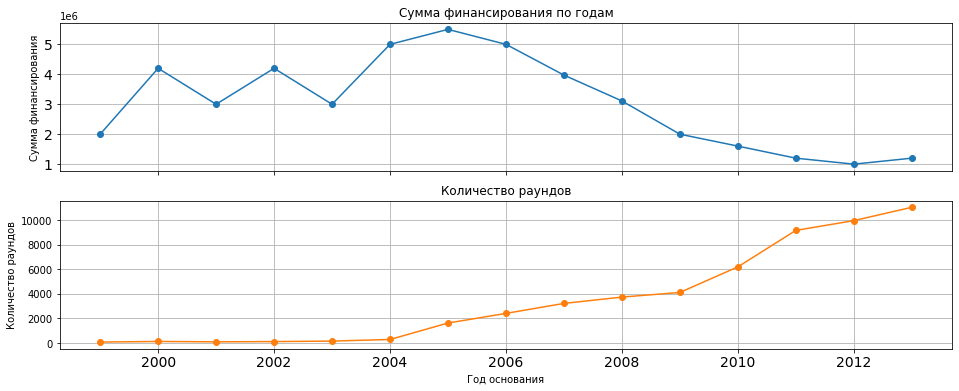

In [77]:
# Группируем данные
df_agg = df_company.groupby('funded__at').agg({'raised__amount':'median', 'funding__rounds':'count'})

# Фильтруем данные, оставляя только те, где количество раундов больше 50
df_agg = df_agg[df_agg['funding__rounds'] > 50]

# Строим график
axes = df_agg.plot(kind='line',
                   subplots=True,
                   sharex=True,
                   sharey=False,
                   legend=False,
                   marker='o', # Установка маркера для точек
                   title=['Сумма финансирования по годам', 'Количество раундов'],
                   figsize=(16, 6))

# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('Сумма финансирования')
axes[1].set_ylabel('Количество раундов')

# Включаем сетку для каждого из подграфиков
axes[0].grid(which='both')
axes[1].grid(which='both')

# Устанавливаем размер шрифта для меток оси Y
axes[0].tick_params(axis='y', labelsize=14)  # Установите нужный размер шрифта
axes[1].tick_params(axis='x', labelsize=14)

# Подписываем ось X
plt.xlabel('Год основания')

pd.options.display.float_format = '{:.2f}'.format

plt.show()

С 1999 года число раундов зафиксировано больше 50.
в период с 1999 по 2004 год количество раундов практически на одной прямой, нет ни роста ни падения. При этом, сумма финансирования имеет пиковое распределение. Рост в 2004 году в сравнении с 1999 годом. Далее два пика 2000 и 2002 года. 
С 2003 года визуализация наглядно показывает рост числа раундов и финансирования. Пик финансирования в 2005 года, возможно обусловлено макс выбросами.
Максимальное число раундов в 2013 год. При этом, отмечается тенденция к снижению финансирования с 2005 года. 
есть тенденция к "дроблению" финансирования - снижение объемов за счет увеличения количества раундов.
Можно сказать, что есть тенденция к "дроблению" финансирования - снижение объемов за счет увеличения количества раундов.
Максимумальное финансирование составило 1.300000e+07. среднее 6700000.0. Но, минимальная продажа составла   400000.0


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [78]:
# Объединение данных
df_sorted = df_people.merge(df_education, how='left', left_on='id', right_on='person_id')
#sorted_people_education_degrees = sorted_people_education.merge(df_degrees, how='left', left_on='id_y', right_on='id')
display(df_sorted)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,2415.00,10.00,Harvard University,NaT
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.00,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.00,network,25958.00,174088.00,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.00,itechsocialnet,18871.00,118386.00,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [79]:
df_sorted.isna().sum()

id_x                     0
first_name               5
last_name                1
company_id          222905
network_username    216919
id_y                158638
person_id           158638
instituition        158692
graduated_at        210003
dtype: int64

In [80]:
df_sorted.duplicated().sum() 

0

Дубликатов в датасете нет

In [81]:
# Группируем по 'id_x' и суммируем значения в столбце 'instituition'
df_sorted['instituition'].value_counts().reset_index()
df_sorted_plot = round(df_sorted['instituition'].count()/len(df_sorted['instituition']) * 100, 2)
print( f'Доля сотрудников с образованим', df_sorted_plot)

Доля сотрудников с образованим 40.72


40.72% сотрудников с образованием. Следовательно,  основная доля сотрудников без образования.

In [82]:
df_sorted.isna().sum()

id_x                     0
first_name               5
last_name                1
company_id          222905
network_username    216919
id_y                158638
person_id           158638
instituition        158692
graduated_at        210003
dtype: int64

In [83]:
#присоединим таблицу degree
df_sorted_degree = df_sorted.merge(df_degrees, how='left', left_on='id_y', right_on='id')

In [84]:
df_sorted_degree['degree_type'].value_counts().reset_index()
df_sorted_degree_plot = round(df_sorted_degree['degree_type'].count()/len(df_sorted_degree['degree_type']) * 100, 2)
print( f'Доля сотрудников с образованим', df_sorted_degree_plot)

Доля сотрудников с образованим 36.57


In [85]:
df_sorted_degree.isna().sum()

id_x                     0
first_name               5
last_name                1
company_id          222905
network_username    216919
id_y                158638
person_id           158638
instituition        158692
graduated_at        210003
id                  158638
object_id           158638
degree_type         169808
subject             186804
dtype: int64

Доля сотрудников стала меньше и составила 36,57%

In [86]:
# Проверки наличия информации об образовании
def create_is_edu(x):
    return not pd.isna(x) and x != 'NaN'

# Применение функции к столбцу 'instituition'
df_sorted_degree['has_education'] = df_sorted_degree['instituition'].apply(create_is_edu)

# Группировка по компаниям и подсчет сотрудников
company_group = df_sorted_degree.groupby('company_id').agg(
    total_employees=('first_name', 'count'),  # считаем количество сотрудников
    employees_with_education=('has_education', 'sum') # считаем количество сотрудников c образованием
).reset_index()
print(company_group)

       company_id  total_employees  employees_with_education
0            1.00                3                         2
1            2.00                1                         1
2            3.00                5                         4
3            4.00               18                        17
4            5.00               84                        68
...           ...              ...                       ...
22917   285897.00                2                         2
22918   285953.00                1                         0
22919   285972.00                2                         1
22920   285996.00                1                         1
22921   286091.00                7                         5

[22922 rows x 3 columns]


In [87]:
# Расчет доли сотрудников без информации об образовании
company_group['employees_without_education'] = company_group['total_employees'] - company_group['employees_with_education']
company_group['percentage_without_education'] = company_group['employees_without_education'] / company_group['total_employees']

# Определение групп по количеству сотрудников
bins = [0, 5, 10, 20, 50, 100, float('inf')]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '100+']
company_group['size_group'] = pd.cut(
    company_group['total_employees'], 
    bins=bins, 
    labels=labels, 
    right=False)

# Расчет средней доли сотрудников без информации об образовании в каждой группе
average_percentage = company_group.groupby('size_group')['percentage_without_education'].mean().reset_index()

# Печать результата
print(average_percentage)


  size_group  percentage_without_education
0        1-5                          0.47
1       6-10                          0.30
2      11-20                          0.32
3      21-50                          0.21
4     51-100                          0.19
5       100+                          0.17


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [88]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company__id            217472 non-null  float64       
 1   name                   217472 non-null  object        
 2   category__code         143886 non-null  object        
 3   status                 217472 non-null  object        
 4   founded__at            109956 non-null  datetime64[ns]
 5   closed__at             3449 non-null    datetime64[ns]
 6   domain                 147159 non-null  object        
 7   network__username      95534 non-null   object        
 8   country__code          108607 non-null  object        
 9   investment__rounds     217472 non-null  float64       
 10  funding__rounds        217472 non-null  float64       
 11  funding__total         217472 non-null  float64       
 12  milestones             217472 non-null  floa

In [89]:
unique_count = df_company['network__username'].nunique()
print(f'Число уникальных значений в столбце: {unique_count}')
network_username_isna = df_company['network__username'].isna().sum()
print(f'Число пропусков в столбце: {network_username_isna}')

Число уникальных значений в столбце: 79571
Число пропусков в столбце: 122240


In [90]:
unique_count = df_people['network_username'].nunique()
print(f'Число уникальных значений в столбце: {unique_count}')
network_username_isna = df_people['network_username'].isna().sum()
print(f'Число пропусков в столбце: {network_username_isna}')

Число уникальных значений в столбце: 38421
Число пропусков в столбце: 187842


In [91]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int32  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 7.8+ MB


In [92]:
unique_count = df_fund['network_username'].nunique()
print(f'Число уникальных значений в столбце: {unique_count}')
network_username_isna = df_fund['network_username'].isna().sum()
print(f'Число пропусков в столбце: {network_username_isna}')

Число уникальных значений в столбце: 2098
Число пропусков в столбце: 9503


In [93]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


в датасете df_company столбец network__username имеет 122240 строка пустая, уникальных значений 79571. Всего 217774 строки
в датасете df_people столбец network__username имеет 187842 строка пустая, уникальных значений 38421. Всего 217774 строки
в датасете df_fund столбец network__username имеет 9503 строк пустых, уникальных значений 2098. Всего 11652 строки.


In [94]:
# Создание списка уникальных значений в df_company
company_network_unique = df_company['network__username'].unique().tolist() 
# Создание списка уникальных значений в df_people
people_network_unique = df_people['network_username'].unique().tolist() 

# Пересечение значений
intersection = pd.Series(company_network_unique).isin(people_network_unique) 
print(intersection)

# Подсчет числа пересечений
count_intersections = intersection.sum()

print(f'Число пересечений: {count_intersections}')

0        False
1         True
2        False
3        False
4        False
         ...  
79567    False
79568    False
79569    False
79570    False
79571    False
Length: 79572, dtype: bool
Число пересечений: 2200


In [95]:
# Создание списка уникальных значений в df_company
company_network_unique = df_company['network__username'].unique().tolist() 
# Создание списка уникальных значений в df_people
fund_network_unique = df_fund['network_username'].unique().tolist() 

# Пересечение значений
intersection = pd.Series(company_network_unique).isin(fund_network_unique) 
print(intersection)

# Подсчет числа пересечений
count_intersections = intersection.sum()

print(f'Число пересечений: {count_intersections}')

0        False
1         True
2        False
3        False
4        False
         ...  
79567    False
79568    False
79569    False
79570    False
79571    False
Length: 79572, dtype: bool
Число пересечений: 71


In [96]:
# Пересечение значений
intersection = pd.Series(people_network_unique).isin(fund_network_unique) 
print(intersection)

# Подсчет числа пересечений
count_intersections = intersection.sum()

print(f'Число пересечений: {count_intersections}')

0         True
1        False
2        False
3        False
4        False
         ...  
38417    False
38418    False
38419    False
38420    False
38421    False
Length: 38422, dtype: bool
Число пересечений: 80


При пересечений датасетов df_company и df_people пересечений значений по столбцу network__username 2200.
При пересечении датасетов df_company и  df_fund пересечений значений по столбцу network__username 71.
При пересечении датасетов df_people и  df_fund пересечений значений по столбцу network__username 80.

Следовательно,объединение df_people и  df_company  более целесообразно в виду большего количества персечений. Большее количество строк так же доказывает, что объединение будет более информативным


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [97]:
df_company.columns

Index(['company__id', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id_1', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round', 'company_ID'],
      dtype='object')

In [98]:
df_company.isna().sum()

company__id                 302
name                        302
category__code            73888
status                      302
founded__at              107818
closed__at               214325
domain                    70615
network__username        122240
country__code            109167
investment__rounds          302
funding__rounds             302
funding__total              302
milestones                  302
funding__round__id       164846
company__id_1            164846
funded__at               165094
funding__round__type     164846
raised__amount           164846
pre__money__valuation    164846
participants             164846
is__first__round         164846
is__last__round          164846
company_ID                    0
dtype: int64

In [99]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company__id            217472 non-null  float64       
 1   name                   217472 non-null  object        
 2   category__code         143886 non-null  object        
 3   status                 217472 non-null  object        
 4   founded__at            109956 non-null  datetime64[ns]
 5   closed__at             3449 non-null    datetime64[ns]
 6   domain                 147159 non-null  object        
 7   network__username      95534 non-null   object        
 8   country__code          108607 non-null  object        
 9   investment__rounds     217472 non-null  float64       
 10  funding__rounds        217472 non-null  float64       
 11  funding__total         217472 non-null  float64       
 12  milestones             217472 non-null  floa

In [100]:
df_company_company = df_company[['company__id','name', 
        'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 
        'country__code', 'investment__rounds', 
        'funding__rounds', 'funding__total', 'milestones']].copy()

In [101]:
df_company_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company__id         217472 non-null  float64       
 1   name                217472 non-null  object        
 2   category__code      143886 non-null  object        
 3   status              217472 non-null  object        
 4   founded__at         109956 non-null  datetime64[ns]
 5   closed__at          3449 non-null    datetime64[ns]
 6   domain              147159 non-null  object        
 7   network__username   95534 non-null   object        
 8   country__code       108607 non-null  object        
 9   investment__rounds  217472 non-null  float64       
 10  funding__rounds     217472 non-null  float64       
 11  funding__total      217472 non-null  float64       
 12  milestones          217472 non-null  float64       
dtypes: datetime64[ns](2), float64

In [102]:
df_company_company.duplicated().sum()

21220

In [103]:
# Удаление дубликатов, оставляя первые строки
df_company_company.drop_duplicates(inplace=True)

# Печать DataFrame после удаления дубликатов
print("\nDataFrame после удаления дубликатов:")
df_company_company.duplicated().sum()


DataFrame после удаления дубликатов:


0

In [104]:
df_company_company.isna().sum()

company__id                1
name                       1
category__code         73368
status                     1
founded__at           105327
closed__at            193934
domain                 70009
network__username     115963
country__code         108564
investment__rounds         1
funding__rounds            1
funding__total             1
milestones                 1
dtype: int64

В датасете 21220 дубликатов. Удалила дубликаты, оставив первые строки.
Пропусков много в category__code 73368, founded__at 105327, closed__at 193934, domain 70009, network__username 115963, country__code 108564.

In [105]:
df_company_raund = df_company[['company__id_1', 'funding__round__id',
        'funded__at', 'funding__round__type',
         'raised__amount', 'pre__money__valuation',
          'participants', 'is__first__round',
         'is__last__round']].copy()


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [106]:
# Фильтрация по условиям
df_company_sort = df_company[
    ((df_company['funding__rounds'] > 0) | (df_company['investment__rounds'] > 0)) | 
    (df_company['status'] == 'acquired')
]

# Вывод результата
display(df_company_sort)

,company__id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,funding__round__id,company__id_1,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round,company_ID
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,888.00,1.00,2005.00,series-a,5250000.00,0.00,2.00,0.00,1.00,"1.0, 1.0"
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,889.00,1.00,2007.00,series-b,9500000.00,0.00,3.00,0.00,0.00,"1.0, 1.0"
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,2312.00,1.00,2008.00,series-c+,25000000.00,0.00,4.00,1.00,0.00,"1.0, 1.0"
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10.0, nan"
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"100.0, nan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217466,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,...,20896.00,3429.00,2011.00,venture,7000000.00,0.00,1.00,1.00,0.00,"3429.0, 3429.0"
217467,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,...,2836.00,7748.00,2008.00,angel,1300000.00,0.00,8.00,1.00,1.00,"7748.0, 7748.0"
217469,43233.00,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,...,12687.00,43233.00,2010.00,angel,500000.00,0.00,2.00,0.00,1.00,"43233.0, 43233.0"
217470,43233.00,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,...,21259.00,43233.00,2011.00,series-a,7000000.00,0.00,5.00,0.00,0.00,"43233.0, 43233.0"


In [107]:
df_company_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61666 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company__id            61666 non-null  float64       
 1   name                   61666 non-null  object        
 2   category__code         56015 non-null  object        
 3   status                 61666 non-null  object        
 4   founded__at            46536 non-null  datetime64[ns]
 5   closed__at             2957 non-null   datetime64[ns]
 6   domain                 56368 non-null  object        
 7   network__username      35793 non-null  object        
 8   country__code          55359 non-null  object        
 9   investment__rounds     61666 non-null  float64       
 10  funding__rounds        61666 non-null  float64       
 11  funding__total         61666 non-null  float64       
 12  milestones             61666 non-null  float64       
 13  

In [108]:
# Вывод дубликатов
duplicates = df_company_sort[df_company_sort.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [company__id, name, category__code, status, founded__at, closed__at, domain, network__username, country__code, investment__rounds, funding__rounds, funding__total, milestones, funding__round__id, company__id_1, funded__at, funding__round__type, raised__amount, pre__money__valuation, participants, is__first__round, is__last__round, company_ID]
Index: []

[0 rows x 23 columns]


в новом датасете 61666 строки, 23 столбца, объем 11.3+ Mв


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

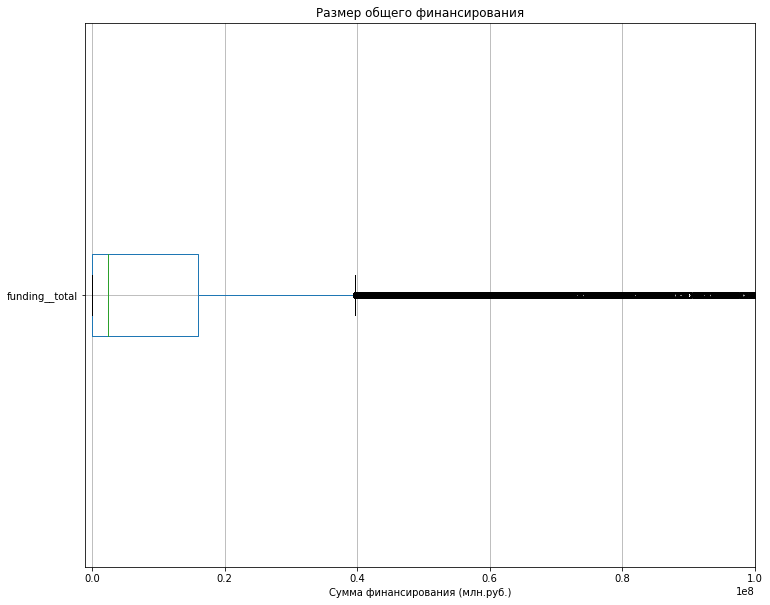

In [109]:
# Строим диаграмму размаха методом boxplot()
boxplot = df_company_sort.boxplot(column='funding__total',
                     vert=False, 
                     figsize=(12, 10))
# Добавляем заголовок и метку оси X
boxplot.set_title('Размер общего финансирования')
boxplot.set_xlabel('Сумма финансирования (млн.руб.)')
plt.xlim(-1000000,100000000)
plt.show()

Огромное количество выбросов отмечается свыше 4 млн.рублей

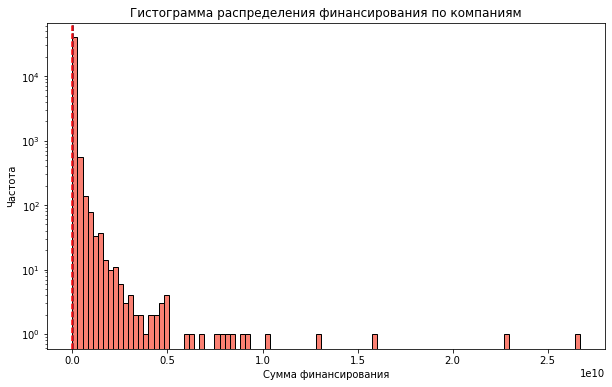

In [110]:
# Группируем данные по наименованию компании и суммируем финансирование
grouped_data = df_company_sort.groupby('name')['funding__total'].sum().reset_index()

# Устанавливаем размеры графика
plt.figure(figsize=(10, 6))

# Строим гистограмму, настраивая параметры отображения
plt.hist(grouped_data['funding__total'], bins=100, alpha=1, 
         color='salmon', edgecolor='black'
)
plt.yscale('log')  # Применяем логарифмическую шкалу к оси Y

# Устанавливаем заголовок графика
plt.title('Гистограмма распределения финансирования по компаниям')

# Устанавливаем подпись оси X
plt.xlabel('Сумма финансирования')

# Устанавливаем подпись оси Y
plt.ylabel('Частота')

# вычисление процентилей для отфильтрованных данных
percentiles = np.percentile(grouped_data['funding__total'], [90, 85, 75, 50])
percentile_labels = ['90%', '85%', '75%', '50%']
percentile_colors = ['green', 'purple', 'brown', 'red']  # разные цвет для каждой линии

# добавление вертикальных линий для процентилей с разными цветами
for percentile, label, color in zip(percentiles, percentile_labels, percentile_colors):
    plt.axvline(percentile, color=color, linestyle='--', label=f'{label}: {percentile:,.0f}')
    
# Отображаем график
plt.show()

In [111]:
grouped_data.value_counts()

name                 funding__total
"Canal do Credito"   750000.00         1
REAC Fuel            4500000.00        1
RB-Doors             11000000.00       1
RBK Money            0.00              1
RBS e.BricksDigital  0.00              1
                                      ..
GiftRocket           0.00              1
Giftah               1580.00           1
Giftango             12800000.00       1
Giftiki              2040000.00        1
ÜberResearch         0.00              1
Length: 40747, dtype: int64

In [112]:
# Выводим результат describe()
print(df_company_sort['funding__total'].describe())

count        61666.00
mean      21146234.18
std       90130450.99
min              0.00
25%          60000.00
50%        2490000.00
75%       15948800.00
max     5700000000.00
Name: funding__total, dtype: float64


Число финансовых процедур составило 61666.
Средняя сумма финансирования 21146234
стандартная сумма финансирования 90130450.99
25%          60000.00
50%        2490000.00
75%       15948800.00
max сумма финансирования составила 5700000000.00


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [113]:
df_company_sort.columns

Index(['company__id', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id_1', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round', 'company_ID'],
      dtype='object')

In [114]:
df_acquisition.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [115]:
#Переименуем столбец company__id
df_company_sort.rename(columns={'company__id':'acquired_company_id'}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [116]:
#Присоединим df_acquisition
df_company_merge = pd.merge(df_company_sort, df_acquisition, on='acquired_company_id', how ='left')

In [117]:
df_company_merge

,acquired_company_id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,pre__money__valuation,participants,is__first__round,is__last__round,company_ID,id,acquiring_company_id,term_code,price_amount,acquired_at
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,0.00,2.00,0.00,1.00,"1.0, 1.0",NaN,NaN,NaN,NaN,NaT
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,0.00,3.00,0.00,0.00,"1.0, 1.0",NaN,NaN,NaN,NaN,NaT
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,0.00,4.00,1.00,0.00,"1.0, 1.0",NaN,NaN,NaN,NaN,NaT
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,"10.0, nan",1.00,11.00,NaN,20000000.00,2007-05-30
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,"100.0, nan",20.00,377.00,cash,0.00,2005-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61850,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,...,0.00,1.00,1.00,0.00,"3429.0, 3429.0",NaN,NaN,NaN,NaN,NaT
61851,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,...,0.00,8.00,1.00,1.00,"7748.0, 7748.0",NaN,NaN,NaN,NaN,NaT
61852,43233.00,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,...,0.00,2.00,0.00,1.00,"43233.0, 43233.0",6968.00,5.00,cash_and_stock,1010470000.00,2012-04-09
61853,43233.00,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,...,0.00,5.00,0.00,0.00,"43233.0, 43233.0",6968.00,5.00,cash_and_stock,1010470000.00,2012-04-09


In [118]:
#Фильтрация по условиям
df_company_price = df_company_merge[
    ((df_company_merge['price_amount'] == 0) | (df_company_merge['price_amount'] == 1) & 
    (df_company_merge['funding__total'] > 0))
]

# Вывод результата
display(df_company_price)

,acquired_company_id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,pre__money__valuation,participants,is__first__round,is__last__round,company_ID,id,acquiring_company_id,term_code,price_amount,acquired_at
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,"100.0, nan",20.00,377.00,cash,0.00,2005-05-29
6,10014.00,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,...,0.00,1.00,1.00,1.00,"10014.0, 10014.0",3878.00,23054.00,NaN,0.00,2010-09-30
30,100265.00,Coastal Supply Company,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,"100265.0, nan",6106.00,38215.00,NaN,0.00,2011-09-06
36,1004.00,Tioti,games_video,acquired,NaT,NaT,tioti.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,"1004.0, nan",796.00,15389.00,NaN,0.00,2008-12-15
37,10049.00,INNCOM,hardware,acquired,1986-01-01,NaT,inncom.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,"10049.0, nan",7201.00,15850.00,NaN,0.00,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61808,118723.00,NetworkBar,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,"118723.0, nan",6217.00,21138.00,NaN,0.00,2011-04-06
61809,11484.00,Networktise,web,acquired,2008-08-01,NaT,networktise.com,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,"11484.0, nan",8605.00,205151.00,NaN,0.00,2013-05-10
61832,153326.00,Yoke,web,acquired,NaT,NaT,apps.socialnet.com::yokeapp,NaN,NaN,0.00,...,0.00,2.00,1.00,1.00,"153326.0, 153326.0",7948.00,2352.00,NaN,0.00,2012-09-11
61841,53224.00,UberNetwork,web,acquired,NaT,NaT,ubernetwork.com::,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,"53224.0, nan",5034.00,45529.00,NaN,0.00,2011-01-23


In [119]:
# Получение уникальных значений в столбце 'name'
unique_names = df_company_price['name'].unique()

In [174]:
# Определим процентильные значения
print(df_company_sort['funding__total'].describe(percentiles=[0, 0.25, 0.5, 0.6, 0.7, 0.8, 0.95, 0.99]))

count        61666.00
mean      21146234.18
std       90130450.99
min              0.00
0%               0.00
25%          60000.00
50%        2490000.00
60%        5500000.00
70%       11100000.00
80%       22939700.00
95%       85650000.00
99%      255000000.00
max     5700000000.00
Name: funding__total, dtype: float64


In [121]:
# Рассчитаем Q1 и Q3
Q1 = df_company_sort['funding__total'].quantile(0.25)
Q3 = df_company_sort['funding__total'].quantile(0.75)

# Рассчитаем IQR
IQR = Q3 - Q1

# Определим границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Нижняя граница выбросов: {lower_bound}')
print(f'Верхняя граница выбросов: {upper_bound}')

Нижняя граница выбросов: -23773200.0
Верхняя граница выбросов: 39782000.0


In [173]:
#Находим число значений меньше верхней границ
count_upper_bound = (df_company_sort['funding__total'] <= upper_bound).sum()
print(count_upper_bound)

53769


In [175]:
#Находим общее число значений
count_upper = (df_company_sort['funding__total']> upper_bound).sum()
print(count_upper)

7897


In [178]:
#Находим процентиль
procentel = round((count_upper_bound/(count_upper_bound+count_upper)) * 100, 2)

Анализ компаний, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. показывает.
Число раунов у таких компаний было 8386. Средняя финансования сумма 10517732.65, стандартная - 126777814.85.

In [179]:
print(f'Верхняя граница выбросов: {upper_bound}, соответствует {procentel} процентилю')

Верхняя граница выбросов: 39782000.0, соответствует 87.19 процентилю


Нижняя граница выбросов: -23773200.0
Очевидно отрицательная нижняя граница, которая просто интерпретируется как 0.
Верхняя граница выбросов: 39782000.0, соответствует 87.19 процентилю
При замене верхней границы выбросов на значения, расположенные в 75% процентилях, приведет к риску. В случае удачной финансовой сделке, возможна макисмальная прибыль 


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [139]:
# Группировка данных
grouped = df_company_sort.groupby('category__code')['funding__total'].agg(['mean', 'std', 'max'])

In [147]:
# Тoп категорий по цене
print(f'Компании в категории с наибольшими ценами:')
print(grouped['max'].sort_values( ascending=False).head(5))

Компании в категории с наибольшими ценами:
category__code
mobile          5700000000.00
health          2600000000.00
social          2425700000.00
biotech         2400000000.00
manufacturing   1765500000.00
Name: max, dtype: float64


In [149]:
# Тoп категорий по разбросу
print(f'Компании в категории с наибольшим разбросом цен:')
print(grouped.sort_values('std', ascending=False).head(5))

Компании в категории с наибольшим разбросом цен:
                       mean          std           max
category__code                                        
automotive     155127783.60 377283161.46 1451000000.00
social          49368151.11 278301225.56 2425700000.00
manufacturing   46379680.73 220088302.26 1765500000.00
mobile          24647835.09 207306194.78 5700000000.00
nanotech        85391234.46 146326586.54  520000000.00


Компания в категории с наибольшими ценами:  mobile
Компании в категории с наибольшим разбросом цен: automotive 

Топ компании в категории с наибольшими ценами:
mobile  максимальная цена - 5700000000.00
health максимальная цена - 2600000000.00
social максимальная цена - 2425700000.00
biotech максимальная цена - 2400000000.00
manufacturing максимальная цена -1765500000.00

Топ компании в категории с наибольшим разбросом цен:                                     
automotive средняя цена - 155127783.60 разброс цен: 377283161.46 -1451000000.00
social средняя цена - 49368151.11 разброс цен: 278301225.56 - 2425700000.00
manufacturing средняя цена - 46379680.73 разброс цен: 220088302.26 - 1765500000.00
mobile средняя цена -  24647835.09 разброс цен: 207306194.78 - 5700000000.00
nanotech  средняя цена - 85391234.46 разброс цен: 146326586.54 - 520000000.00


Нижняя граница выбросов: -23773200.0, соответствует 0.0 процентилю
Верхняя граница выбросов: 39782000.0, соответствует 255000000.0 процентилю


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [ ]:
# Фильтрация данных: оставляем только те строки, где количество раундов больше 0
df_company_filtered = df_company_sort[df_company_sort['funding__rounds'] > 0]

# Группировка и агрегация данных
df_company_startap = df_company_filtered.groupby('status')['funding__rounds'].agg(['mean', 'std', 'max'])

df_company_startap


In [ ]:
# Группируем данные
df_startap = df_company_filtered.groupby('status').agg({'funding__rounds':'mean'})

# Строим график
axes = df_startap.plot(kind='bar',  # Изменено с 'line' на 'bar'
                   subplots=True,
                   sharex=True,
                   sharey=False,
                   legend=False,
                   title=['Среднее число раундов'],
                   figsize=(16, 6))

# Устанавливаем подпись для оси Y графика
axes[0].set_ylabel('Количество раундов')

# Включаем сетку для подграфика
axes[0].grid(which='both')

# Устанавливаем размер шрифта для меток оси Y
axes[0].tick_params(axis='y', labelsize=14)  # Установите нужный размер шрифта

# Подписываем ось X
plt.xlabel('Статус')

pd.options.display.float_format = '{:.2f}'.format

plt.show()

Максимальное число раундов отмечает при статусе стартапа operating (15 шт.), Чуть меньше ipo (13) и acquired (12) Самое маленькое количество у статуса closed - 8 шт.
Среднее число раундов отличается! 
На первое место выходит статус ipo среднее число раундов составляет 4, 47, стандартное 3,18, на втором месте acquired среднее число раундов составляет 2.76, стандартное 1.79, чуть меньше статус operating 2,49 и 1,87 соответственно. Меньше всего у статуса closed.  среднее число раундов 1.89, стандартное 	1.34,максиально число  8.00.
Визуализаци показывает, что среднее количество раундов наблюдается у стартапы со статусом ipo. Далее с небольшим различием статусы operating, acquired. Меньшее число раундов у стартапов closed.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Перед проведением анализа, мною проведена преобработка имеющихся таблиц, а именно:
Датасет df_company содержит информацию о компаниях и раундах финансирования. Представлен 22 столбцами и 217774 строками. Объем данных 36.6+ MB. 
Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. Столбцы acquired_at, closed at, funded at представлены типом данных object. 
Предложения: founded__at, closed at, funded at перевести в тип данных datetime. Дубликатов нет.
в датафрейме df_company каждый столбец имеет пропуски. 98 % в столбце closed__at - 214325 строк.
76% отмечается во многих столбцах - founded__at (107818), funding__round__id (164846), company__id (164846), funded__at (165094), funding__round__type (164846), raised__amount (164846), pre__money__valuation (164846), participants (164846), is__first__round (164846), is__last__round (164846)
56 % в столбце network__username (122240), 50% в столбцах country__code (109167), founded__at (107818).
34% в столбце category__code 73888.
В столбце domain 70615 пропуска, что составило 32 %.
В меньшем количестве (0,00%) столбцы company__ID, milestones, name, funding__rounds, investment__rounds, status, funding__total. Данные столбцы пригодны к обработке без искажения данных. Привеены к соответствию тип данных

Датасет df_acquisition содержит информацию о покупках одними компаниями других компаний. Представлен 6 столбцами и содержит 9407 строк. Объем данных 441.1+ KB. Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. Столбец acquired_at так же представлен типом данных object. Данные в столбце acquired_at переведены в тип данных datetime. В id уменьшена разрядность типа данных. Дубликатов нет.
Датафрейм df_acquisition стоблец term_code содержит 7576 пропусков (81%) и acquired_at 29 пропусков (0%). Значимое количество попусков в столбце term_code - варианты расчёта.

Датасет df_degrees содержит информацию об образовании сотрудника. Представлен 4 столбцами и содержит 109610 строк. Объем данных 3.3+ MB. Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. Столбец id уменьшена разрядность типа данных. Дубликатов нет. 
Число пропусков в df_degrees составляет: degree_type 11218 (10%) subject 28312 (26%)

Число пропусков в df_fund составляет: в name 2 (0,00%), founded_at 7047 (60%) domain 4290 (37%) network_username 9503 (82%) country_code 4599 (39%)


Датасет df_education содержит информацию информацию о сотрудниках. Представлен 4 столбцами и содержит 109610 строк. Объем данных 3.3+ MB. Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. Данные столбца id: уменьшена разрядность типа данных. graduated_at переведен в тип данных datetime. Дубликатов нет.

Датасет display содержит информацию о фондах. Представлен 9 столбцами и содержит 11652 строк. Объем данных 819.4+ KB. Столбцы с числовыми данными представлены типом данных int64, столбцы с вещественными данными представлены типом данных object. Данные столбца id: уменьшена разрядность типа данных. Данные стобца founded_at переведдены в тип данных datetime. Дубликатов нет.

Датасет df_investment Содержит информацию о раундах инвестирования. Представлен 4 столбцами и содержит 61403 строк. Объем данных 1.9 MB. Dct cтолбцы с числовыми данными представлены типом данных int64 Учитывая небольшой объем памяти, оставлен в первоначальном виде. Дубликатов нет.

Датасет df_people Содержит информацию о типе образования сотрудника. Представлен 5 столбцами и содержит 226709 строк. Объем данных 8.6+ MB. Столбцы с числовыми данными представлены типом данных int64, float64, столбцы с вещественными данными представлены типом данных object. Данные столбца id: уменьшена разрядность типа данных. Дубликатов нет. Число пропусков в df_people в столбце company_id - 192094 (85%), network_username - 187842 (83%), last_name -1 (0%).

На основании датасета company_and_rounds.csv. проведен анализ количества финансовых процедур. 
Общее количество раундов финансирования составило 52928 шт. Среднее финансирование 7946092.26 рублей, max составил 3835050000.00 рублей
Можно предположить, что данные столбца "raised__amount" имеют правостороннее распределение. Значение стандартного отклонения значимо выше среднего —  42168205.89, при среднем 7946092.26, что указывает, что данные могут иметь незначительный разброс. Разница между минимальным и максимальным значениями это подтверждает.

В период с 1960 года по 2013год рост раунов отмечается с 2005 года. По этого периода в пределах 10 раундов отмечалось вплодь до 1997 года, финансирование составляло  до 8.000000e+06.
В период с 2000 до 2005 год число раундов составило от 100 до 286 макс. финансирование составляло 2.000000e+08 (2002 год).
С 2005 года стабильна тенденция по росту числа раундов. Пик прихолится на 2013 год. 
Максимальное количество рандов отмечалось в 2013 году. В этом же г.максимальная сумма финансирования составила 3.822520e+09. Нулевых раундов не было. При снижении максимального финансирования в 2013 году по сравнению с 2012(3.822520e+09 против 3.835050e+09), среднее финансирование возрасло (2013 год 1200000.0, 2012 год -  1000000.0).
Обращает внимание минимальное инансирование. Только в 1994, 1998, 1990, 1992 годах оно было плюсовым. В остальные годы оно нулевое.

Анализ предоставленной информации в датасетах позволил сделать определенные выводы.
Информация в датасетах представлена, начиная с  1960 года по 2013 год Период с 1960 года по 1999 год число раундов насчитывалось до 50. Поэтому, будем анализировать те года, когда число рауодв превышает 50раунов. А это период с 1999 года по 2013 года.

В период с 1999 года по 2004 год количество раундов практически на одной прямой, нет ни роста ни падения. При этом, сумма финансирования имеет пиковое распределение. Рост в 2004 году в сравнении с 1999 годом. Далее два пика 2000 и 2002 года. С 2003 года визуализация наглядно показывает рост числа раундов и финансирования. 

Пик финансирования в 2005 года, возм
ожно обусловлено макс выбросами. Максимальное число раундов в 2013 году. При этом, отмечается тенденция к снижению финансирования с 2005 года. Возможно, есть тенденция к "дроблению" финансирования - снижение объемов за счет увеличения количества раундов. 
Максимумальное финансирование составило 1.300000e+07. среднее 6700000.0. Но, минимальная продажа составла 400000.0


Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

Среднюю долю сотрудников без информации об образовании равна 40.72%. 

При пересечений датасетов df_company и df_people пересечений значений по столбцу network__username 2200. При пересечении датасетов df_company и df_fund пересечений значений по столбцу network__username 71. При пересечении датасетов df_people и df_fund пересечений значений по столбцу network__username 80.
Следовательно,объединение df_people и df_company более не целесообразно в виду маленькой доли пересечений. 

В процессе работы над проектом выявлено, что в датасете df_company  фактически "склеены" две таблицы - данные по компаниям, данные по раундам финансирования. Датасет разделен на две таблицы. Таблица с данными по компаниям проанализирована, удалены дубликаты.
Нализз компаний проведен далее в таблицах,  которых указаны значения funding_rounds или investment_rounds больше нуля, и те, у которых в колонке status указано acquired.

Аналмз выброс: Число финансовых процедур составило 61666. Средняя сумма финансирования 21146234 стандартная сумма финансирования 90130450.99 25% 60000.00 50% 2490000.00 75% 15948800.00 max сумма финансирования составила 5700000000.00. Отмечается большое количество выбросов отмечается свыше 4 млн.рублей

Анализ компаний, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. показывает. Число раунов у таких компаний было 8386. Средняя финансования сумма 10517732.65, стандартная - 126777814.85. Нижняя граница выбросов для столбца funding_total равна нулю.Верхняя 4100000.00, что соответвтует 75% процентилям границы. выбросы составили 5700000000.00, что максимально по всем компаниями.

При замене верхней границы выбросов на значения, расположенные в 75% процентилях, приведет к риску. В случае удачной финансовой сделки, возможна макисмальная прибыль

Компания в категории с наибольшими ценами:  mobile
Компании в категории с наибольшим разбросом цен: automotive 
Нижняя граница выбросов составляет: -23773200.0, соответствует 0.0 процентилю
Верхняя граница выбросов составляет: 39782000.0, соответствует 255000000.0 процентилю

Максимальное число раундов отмечает при статусе стартапа operating (15 шт.), Чуть меньше ipo (13) и acquired (12) Самое маленькое количество у статуса closed - 8 шт. Среднее число раундов отличается! На первое место выходит статус ipo среднее число раундов составляет 4, 47, стандартное 3,18, на втором месте acquired среднее число раундов составляет 2.76, стандартное 1.79, чуть меньше статус operating 2,49 и 1,87 соответственно. Меньше всего у статуса closed. среднее число раундов 1.89, стандартное 1.34,максиально число 8.00. Визуализаци показывает, что среднее количество раундов наблюдается у стартапы со статусом ipo. Далее с небольшим различием статусы operating, acquired. Меньшее число раундов у стартапов closed.

Анализ компаний, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. показывает.
Число раунов у таких компаний было 8386. Средняя финансования сумма 10517732.65, стандартная - 126777814.85.
Нижняя граница выбросов: -23773200.0
Очевидно отрицательная нижняя граница, которая просто интерпретируется как 0.
Верхняя граница выбросов: 39782000.0, соответствует 87.19 процентилю
При замене верхней границы выбросов на значения, расположенные в 75% процентилях, приведет к риску. В случае удачной финансовой сделке, возможна макисмальная прибыль 